In [1]:
## anna jaeger wrote most of these scripts unless otherwise noted

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
plt.rcParams["font.family"] = "Arial"

In [2]:
vars = pd.read_csv('variants.tsv', sep = '\t')
vars

In [4]:
# some QC
vars.loc[vars['segment'] == 'na', 'gene'] = 'NA'
vars['amino_acid'] = vars['coding_region_change'].str.extract('(\d+)')
vars['gene_pos'] = vars['gene'] + "_" + vars['amino_acid'].astype(str) 
vars['sample_var'] = vars['sample'] + "_" + vars['gene_pos'].astype(str)
vars['syn_non'] = vars['coding_region_change'].apply(
    lambda x: 'synonymous' if x[:3] == x[-3:] else 'nonsynonymous'
)
vars['rep_shared'] = np.where(
    (vars['Frequency_1'].fillna(0) > 0) & (vars['Frequency_2'].fillna(0) > 0),
    'shared',
    'single'
)
vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared
0,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1,351,HA_351,c1_HA_351,nonsynonymous,shared
1,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single
2,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single
3,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single
4,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,pb2,1984,T,Ser653Pro,PB2,0.0173,0.0000,c9,653,PB2_653,c9_PB2_653,nonsynonymous,single
2087,pb2,2067,T,Asp680Asp,PB2,0.0390,0.0000,c9,680,PB2_680,c9_PB2_680,synonymous,single
2088,pb2,2155,A,Ile710Val,PB2,0.0149,0.0000,c9,710,PB2_710,c9_PB2_710,nonsynonymous,single
2089,pb2,2179,A,Lys718Glu,PB2,0.0275,0.0000,c9,718,PB2_718,c9_PB2_718,nonsynonymous,single


[Text(0.5, 0, 'Rep 1 Frequency'), Text(0, 0.5, 'Rep 2 Frequency')]

<Figure size 800x800 with 0 Axes>

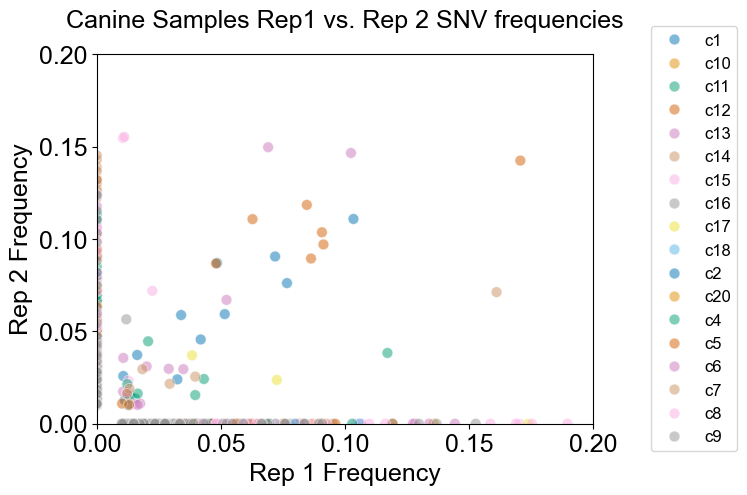

In [5]:
# showing how many variants are shared between replicates vs single

plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 8)) 

fig, ax = plt.subplots()

sns.scatterplot(data=vars, x="Frequency_1", y="Frequency_2", s=60, alpha=.5, hue='sample', palette='colorblind')
plt.ylim(0, 0.2)
plt.xlim(0, 0.2)
plt.title('Canine Samples Rep1 vs. Rep 2 SNV frequencies', y=1.05, fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=12)

ax.set(xlabel='Rep 1 Frequency', ylabel='Rep 2 Frequency')

In [6]:
vars['rep_shared'].value_counts()


rep_shared
single    2020
shared      71
Name: count, dtype: int64

In [7]:
vars_result = vars.groupby('gene')['rep_shared'].value_counts()
vars_result

gene  rep_shared
HA    single        327
      shared         19
M1    single        118
      shared          6
M2    single         55
      shared          2
NA    single        314
      shared          4
NEP   single         29
NP    single        275
      shared          3
NS1   single         87
      shared          5
PA    single        330
      shared         12
PB1   single        160
      shared          6
PB2   single        325
      shared         14
Name: count, dtype: int64

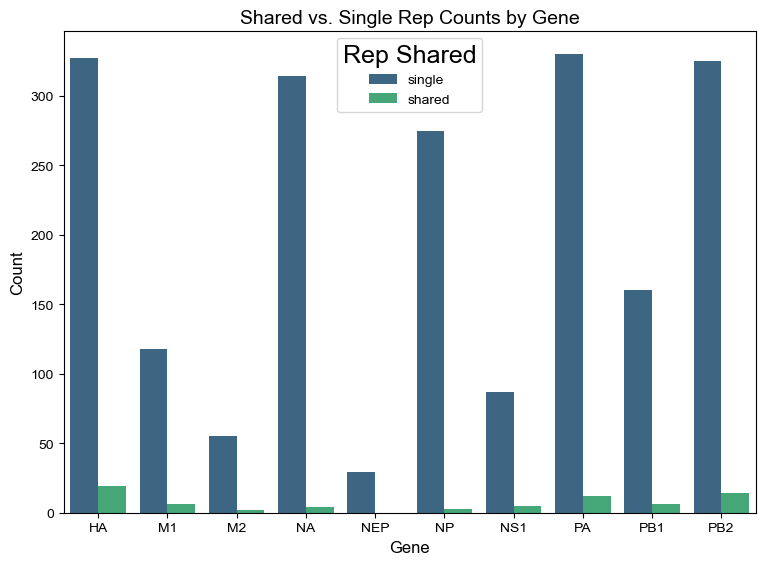

In [8]:
# Group by 'gene' and count unique values in 'rep_shared'
result = vars.groupby('gene')['rep_shared'].value_counts().reset_index(name='count')

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=result, x='gene', y='count', hue='rep_shared', palette='viridis')

# Add labels and title
plt.xlabel('Gene', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Shared vs. Single Rep Counts by Gene', fontsize=14)
plt.legend(title='Rep Shared', fontsize=10, loc='upper center')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


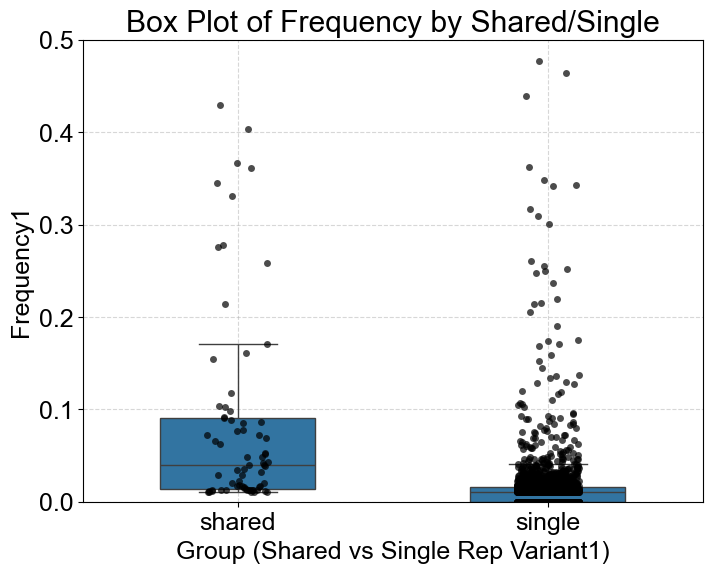

In [9]:
# Create box plot with individual data points
plt.figure(figsize=(8, 6))
sns.boxplot(x='rep_shared', y='Frequency_1', data=vars, width=0.5, showfliers=False)  
sns.stripplot(x='rep_shared', y='Frequency_1', data=vars, jitter=True, color='black', alpha=0.7) 

plt.xlabel("Group (Shared vs Single Rep Variant1)")
plt.ylabel("Frequency1")
plt.title("Box Plot of Frequency by Shared/Single")
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylim(0, 0.5)

plt.show()

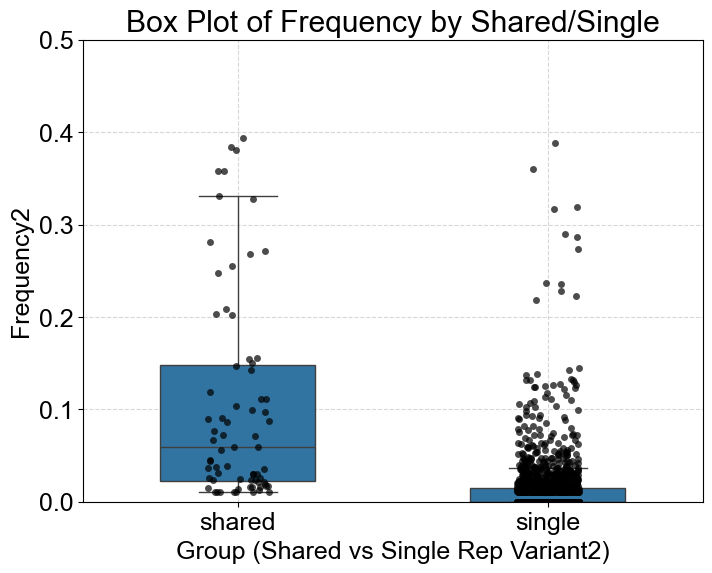

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rep_shared', y='Frequency_2', data=vars, width=0.5, showfliers=False)  # Box plot
sns.stripplot(x='rep_shared', y='Frequency_2', data=vars, jitter=True, color='black', alpha=0.7)  # Individual points

plt.xlabel("Group (Shared vs Single Rep Variant2)")
plt.ylabel("Frequency2")
plt.title("Box Plot of Frequency by Shared/Single")
plt.grid(True, linestyle="--", alpha=0.5)

plt.ylim(0, 0.5)


plt.show()

In [11]:
import scipy.stats as stats

# Calculate means
vars = vars.dropna(subset=["Frequency_1"])

means = vars.groupby("rep_shared")["Frequency_1"].mean()
print("Mean Frequency1 by Group:")
print(means)

Mean Frequency1 by Group:
rep_shared
shared    0.085427
single    0.015760
Name: Frequency_1, dtype: float64


In [12]:
import scipy.stats as stats

# Calculate means
vars = vars.dropna(subset=["Frequency_2"])

means = vars.groupby("rep_shared")["Frequency_2"].mean()
print("Mean Frequency2 by Group:")
print(means)


Mean Frequency2 by Group:
rep_shared
shared    0.104756
single    0.012363
Name: Frequency_2, dtype: float64


In [71]:
single_rep_vars = vars[vars['rep_shared'] == 'single'].copy()
single_rep_vars['avg_freq'] = single_rep_vars['Frequency_1'] + single_rep_vars['Frequency_2']

single_rep_vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,freq_bin,ct_value,gene_pos_nt
0,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single,0.0121,0.01–0.02,17.3,HA_1219
1,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single,0.0106,0.01–0.02,17.3,HA_1343
2,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single,0.0101,0.01–0.02,17.3,HA_1426
3,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single,0.0104,0.01–0.02,17.3,HA_1449
4,mp,722,C,Leu233Phe,M1,0.0000,0.0118,c1,233,M1_233,c1_M1_233,nonsynonymous,single,0.0118,0.01–0.02,17.3,M1_722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,pb2,1984,T,Ser653Pro,PB2,0.0173,0.0000,c9,653,PB2_653,c9_PB2_653,nonsynonymous,single,0.0173,0.01–0.02,31.0,PB2_1984
2016,pb2,2067,T,Asp680Asp,PB2,0.0390,0.0000,c9,680,PB2_680,c9_PB2_680,synonymous,single,0.0390,0.03–0.04,31.0,PB2_2067
2017,pb2,2155,A,Ile710Val,PB2,0.0149,0.0000,c9,710,PB2_710,c9_PB2_710,nonsynonymous,single,0.0149,0.01–0.02,31.0,PB2_2155
2018,pb2,2179,A,Lys718Glu,PB2,0.0275,0.0000,c9,718,PB2_718,c9_PB2_718,nonsynonymous,single,0.0275,0.02–0.03,31.0,PB2_2179


In [70]:
shared_vars = vars[vars['rep_shared'] == 'shared'].copy()

shared_vars['avg_freq'] = shared_vars[['Frequency_1', 'Frequency_2']].mean(axis=1)

shared_vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,freq_bin,ct_value,gene_pos_nt
2020,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1,351,HA_351,c1_HA_351,nonsynonymous,shared,0.37745,>0.1,17.3,HA_1081
2021,mp,314,G,Val97Ile,M1,0.0134,0.0152,c1,97,M1_97,c1_M1_97,nonsynonymous,shared,0.01430,0.01–0.02,17.3,M1_314
2022,na,720,A,Asn234Ser,NA,0.0113,0.0128,c1,234,NA_234,c1_NA_234,nonsynonymous,shared,0.01205,0.01–0.02,17.3,NA_720
2023,na,1221,A,Asn401Ser,NA,0.0107,0.0258,c1,401,NA_401,c1_NA_401,nonsynonymous,shared,0.01825,0.01–0.02,17.3,NA_1221
2024,pa,300,T,Asn92Asn,PA,0.0516,0.0593,c1,92,PA_92,c1_PA_92,synonymous,shared,0.05545,0.05–0.1,17.3,PA_300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,pb2,1414,A,Ile463Leu,PB2,0.0184,0.0295,c7,463,PB2_463,c7_PB2_463,nonsynonymous,shared,0.02395,0.02–0.03,23.0,PB2_1414
2087,pb2,2133,A,Lys702Lys,PB2,0.0130,0.0101,c7,702,PB2_702,c7_PB2_702,synonymous,shared,0.01155,0.01–0.02,23.0,PB2_2133
2088,np,436,G,Ala131Thr,NP,0.0224,0.0719,c8,131,NP_131,c8_NP_131,nonsynonymous,shared,0.04715,0.04–0.05,29.6,NP_436
2089,pb2,1936,A,Thr637Ala,PB2,0.0111,0.1552,c8,637,PB2_637,c8_PB2_637,nonsynonymous,shared,0.08315,0.05–0.1,29.6,PB2_1936


In [16]:
##since i needed to get avg vars differently for single and shared, did that now will concat together for big vars df
vars = pd.concat([single_rep_vars, shared_vars], ignore_index=True)
vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq
0,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single,0.01210
1,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single,0.01060
2,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single,0.01010
3,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single,0.01040
4,mp,722,C,Leu233Phe,M1,0.0000,0.0118,c1,233,M1_233,c1_M1_233,nonsynonymous,single,0.01180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,pb2,1414,A,Ile463Leu,PB2,0.0184,0.0295,c7,463,PB2_463,c7_PB2_463,nonsynonymous,shared,0.02395
2087,pb2,2133,A,Lys702Lys,PB2,0.0130,0.0101,c7,702,PB2_702,c7_PB2_702,synonymous,shared,0.01155
2088,np,436,G,Ala131Thr,NP,0.0224,0.0719,c8,131,NP_131,c8_NP_131,nonsynonymous,shared,0.04715
2089,pb2,1936,A,Thr637Ala,PB2,0.0111,0.1552,c8,637,PB2_637,c8_PB2_637,nonsynonymous,shared,0.08315


/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_52949/804609946.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = vars.groupby(['freq_bin', 'rep_shared']).size().reset_index(name='count')
/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_52949/804609946.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped['proportion'] = grouped.groupby('freq_bin')['count'].transform(lambda x: x / x.sum())


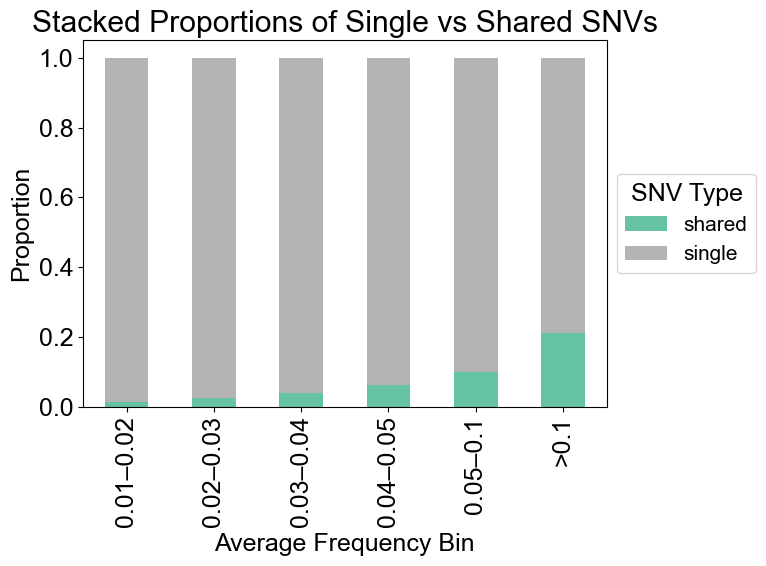

In [17]:
bins = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, float('inf')]
labels = ['0.01–0.02', '0.02–0.03', '0.03–0.04', '0.04–0.05', '0.05–0.1', '>0.1']
vars['freq_bin'] = pd.cut(vars['avg_freq'], bins=bins, labels=labels, right=False)

# Count occurrences of each category in each bin
grouped = vars.groupby(['freq_bin', 'rep_shared']).size().reset_index(name='count')

# Normalize within each bin
grouped['proportion'] = grouped.groupby('freq_bin')['count'].transform(lambda x: x / x.sum())

# Pivot data for stacked bar chart
pivot_df = grouped.pivot(index='freq_bin', columns='rep_shared', values='proportion').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.xlabel('Average Frequency Bin')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of Single vs Shared SNVs')
plt.legend(title='SNV Type', fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [18]:
freq1 = vars.drop(columns=['Frequency_2'])
freq1 = freq1[freq1['Frequency_1'] != 0]

freq2 = vars.drop(columns=['Frequency_1'])
freq2 = freq2[freq2['Frequency_2'] != 0]

freq1 = freq1.rename(columns={'Frequency_1': 'Frequency'})
freq2 = freq2.rename(columns={'Frequency_2': 'Frequency'})


In [19]:
freq_stacked = pd.concat([freq1, freq2], axis=0)
freq_stacked = freq_stacked.drop('freq_bin', axis=1)

freq_stacked

,segment,position,allele,coding_region_change,gene,Frequency,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq
5,mp,981,C,His90Asn,M2,0.0101,c1,90,M2_90,c1_M2_90,nonsynonymous,single,0.01010
6,na,118,G,Val33Val,NA,0.0108,c1,33,NA_33,c1_NA_33,synonymous,single,0.01080
7,na,232,T,Thr71Thr,NA,0.0154,c1,71,NA_71,c1_NA_71,synonymous,single,0.01540
14,pa,468,T,Phe148Phe,PA,0.0108,c1,148,PA_148,c1_PA_148,synonymous,single,0.01080
20,pb2,598,G,Glu191Lys,PB2,0.0243,c1,191,PB2_191,c1_PB2_191,nonsynonymous,single,0.02430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,pb2,1414,A,Ile463Leu,PB2,0.0295,c7,463,PB2_463,c7_PB2_463,nonsynonymous,shared,0.02395
2087,pb2,2133,A,Lys702Lys,PB2,0.0101,c7,702,PB2_702,c7_PB2_702,synonymous,shared,0.01155
2088,np,436,G,Ala131Thr,NP,0.0719,c8,131,NP_131,c8_NP_131,nonsynonymous,shared,0.04715
2089,pb2,1936,A,Thr637Ala,PB2,0.1552,c8,637,PB2_637,c8_PB2_637,nonsynonymous,shared,0.08315


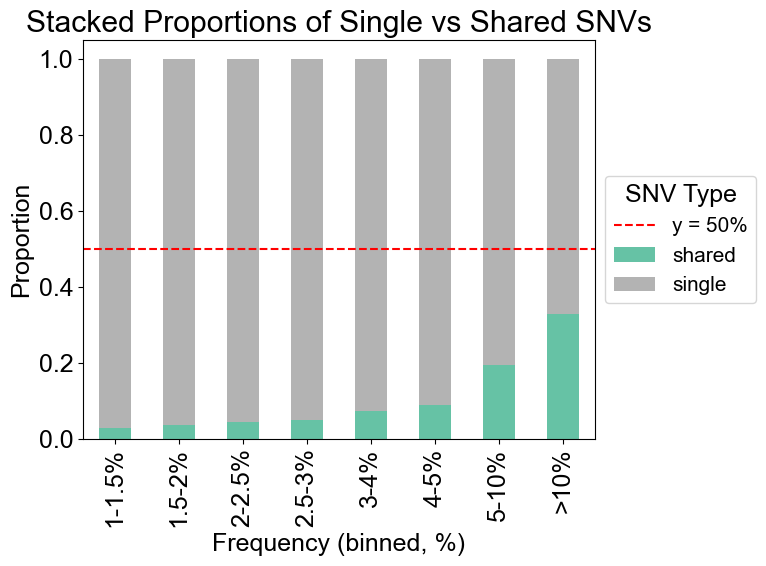

In [66]:
bins = [0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.1, float('inf')]
labels = ['1-1.5%', '1.5-2%', '2-2.5%','2.5-3%', '3-4%', '4-5%', '5-10%', '>10%']
freq_stacked['freq_bin'] = pd.cut(freq_stacked['Frequency'], bins=bins, labels=labels, right=False)

# Count occurrences of each category in each bin
grouped = freq_stacked.groupby(['freq_bin', 'rep_shared'], observed=False).size().reset_index(name='count')

# Normalize within each bin
grouped['proportion'] = grouped.groupby('freq_bin', observed=False)['count'].transform(lambda x: x / x.sum())

# Pivot data for stacked bar chart
pivot_df = grouped.pivot(index='freq_bin', columns='rep_shared', values='proportion').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.axhline(y=0.5, color='r', linestyle='--', label='y = 50%')


plt.xlabel('Frequency (binned, %)')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of Single vs Shared SNVs')
plt.legend(title='SNV Type', fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [21]:
freq_stacked['freq_bin'].value_counts()

freq_bin
1-1.5%    952
1.5-2%    381
2-2.5%    201
3-4%      153
5-10%     145
2.5-3%    141
>10%      122
4-5%       67
Name: count, dtype: int64

In [22]:


# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(vars, 
                 x="Frequency_1", 
                 y="Frequency_2", 
                 title="Rep1 Frequency vs Rep2 Frequency for all SNVs",
                 labels={"Frequency_1": "Rep 1 SNV Frequency", "Frequency_2": "Rep 2 SNV Frequency"},
                 opacity=0.5,
                 hover_data=["sample_var"])

fig.update_layout(
    width=600,  # Set width
    height=600,  # Set height (same as width for square shape)
    xaxis=dict(scaleanchor="y")  # Ensures 1:1 aspect ratio
)

# Show the plot
fig.show()
# fig.savefig("seq/analysis/figures/rep1_rep2_freq_SNVs.pdf", bbox_inches='tight', dpi=300)
# fig.write_image("seq/analysis/figures/rep1_rep2_freq_SNVs.pdf")

In [23]:
import plotly.express as px

# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(vars, 
                 x="Frequency_1", 
                 y="Frequency_2", 
                 title="Rep1 Frequency vs Rep2 Frequency for all SNVs",
                 labels={"Frequency_1": "Rep 1 SNV Frequency", "Frequency_2": "Rep 2 SNV Frequency"},
                 opacity=0.5)

fig.update_layout(
    width=600,  # Set width
    height=600,  # Set height (same as width for square shape)
    xaxis=dict(scaleanchor="y")  # Ensures 1:1 aspect ratio
)

# Show the plot
fig.show()

In [24]:
import plotly.express as px

# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(shared_vars, 
                 x="Frequency_1", 
                 y="Frequency_2", 
                 title="Rep1 Frequency vs Rep2 Frequency for shared SNVs <15%",
                 labels={"Frequency_1": "Rep 1 SNV Frequency", "Frequency_2": "Rep 2 SNV Frequency"},
                 opacity=0.5,
                 hover_data=["sample_var"])

# Define axis limits
x_min, x_max = 0, 0.15  # Adjust as needed
y_min, y_max = 0, 0.15  # Adjust as needed

# Make the plot square and set axis limits
fig.update_layout(
    width=600,  
    height=600,  
    xaxis=dict(scaleanchor="y", range=[x_min, x_max]),  
    yaxis=dict(range=[y_min, y_max])
)

# Show the plot
fig.show()


In [25]:
valcts_sampleIDs = single_rep_vars['sample'].value_counts()
print(valcts_sampleIDs)

sample
c13    320
c4     250
c11    191
c5     190
c15    189
c9     183
c8     167
c16    122
c14     81
c6      78
c12     63
c10     49
c2      39
c7      32
c18     30
c1      25
c17     10
c20      1
Name: count, dtype: int64


In [26]:
# Define your mapping from col_id to ct values
col_id_to_ct = {
    
    'c1': 17.3,
    'c2': 22.4,
    'c3': 36.1,
    'c4': 27.6,
    'c5': 26.8,
    'c6': 22.9,
    'c7': 23.0,
    'c8': 29.6,
    'c9': 31.0,
    'c10': 31.6,
    'c11': 28.9,
    'c12': 24.4,
    'c13': 30.9,
    'c14': 25.7,
    'c15': 29.1,
    'c16': 26.3,
    'c17': 15.3,
    'c18': 31.5,
    'c19': 27.0,
    'c20': 38.4
}


# Create the new column using .map()
vars['ct_value'] = vars['sample'].map(col_id_to_ct)
vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,freq_bin,ct_value
0,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single,0.01210,0.01–0.02,17.3
1,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single,0.01060,0.01–0.02,17.3
2,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single,0.01010,0.01–0.02,17.3
3,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single,0.01040,0.01–0.02,17.3
4,mp,722,C,Leu233Phe,M1,0.0000,0.0118,c1,233,M1_233,c1_M1_233,nonsynonymous,single,0.01180,0.01–0.02,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,pb2,1414,A,Ile463Leu,PB2,0.0184,0.0295,c7,463,PB2_463,c7_PB2_463,nonsynonymous,shared,0.02395,0.02–0.03,23.0
2087,pb2,2133,A,Lys702Lys,PB2,0.0130,0.0101,c7,702,PB2_702,c7_PB2_702,synonymous,shared,0.01155,0.01–0.02,23.0
2088,np,436,G,Ala131Thr,NP,0.0224,0.0719,c8,131,NP_131,c8_NP_131,nonsynonymous,shared,0.04715,0.04–0.05,29.6
2089,pb2,1936,A,Thr637Ala,PB2,0.0111,0.1552,c8,637,PB2_637,c8_PB2_637,nonsynonymous,shared,0.08315,0.05–0.1,29.6


In [27]:
import plotly.express as px

fig = px.scatter(vars, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)  # Adjust transparency for better visibility

fig.show()


In [28]:
import plotly.express as px

fig = px.scatter(vars, 
                 y="ct_value", 
                 x="avg_freq", 
                 color="rep_shared",  # Colors by 'rep_shared'
                 trendline="ols",      # Adds a trend line for each group
                 title="CT-Value vs Frequency (Trend Lines for Each Group)",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()


In [29]:
import plotly.express as px

# Count number of variants for each CT value and rep_shared group
variant_counts = vars.groupby(["ct_value", "rep_shared"]).size().reset_index(name="variant_count")

# Scatter plot with trend line
fig = px.scatter(variant_counts, 
                 x="ct_value", 
                 y="variant_count",  # Now plotting count of variants
                 color="rep_shared",  
                 trendline="ols",    
                 title="CT-Value vs Variant Count (OLS Trend Lines for Each Group)",
                 labels={"ct_value": "Ct-Value", "variant_count": "Number of Variants"},
                 opacity=0.5)

fig.show()


In [30]:
import plotly.express as px

fig = px.scatter(vars, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 trendline="ols",  # Ordinary Least Squares (Linear Regression)
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()


In [31]:
fig = px.scatter(vars, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 trendline="ols",  # Ordinary Least Squares (Linear Regression)
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()

In [32]:
single_rep_vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq
1,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single,0.0121
2,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single,0.0106
3,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single,0.0101
4,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single,0.0104
6,mp,722,C,Leu233Phe,M1,0.0000,0.0118,c1,233,M1_233,c1_M1_233,nonsynonymous,single,0.0118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,pb2,1984,T,Ser653Pro,PB2,0.0173,0.0000,c9,653,PB2_653,c9_PB2_653,nonsynonymous,single,0.0173
2087,pb2,2067,T,Asp680Asp,PB2,0.0390,0.0000,c9,680,PB2_680,c9_PB2_680,synonymous,single,0.0390
2088,pb2,2155,A,Ile710Val,PB2,0.0149,0.0000,c9,710,PB2_710,c9_PB2_710,nonsynonymous,single,0.0149
2089,pb2,2179,A,Lys718Glu,PB2,0.0275,0.0000,c9,718,PB2_718,c9_PB2_718,nonsynonymous,single,0.0275


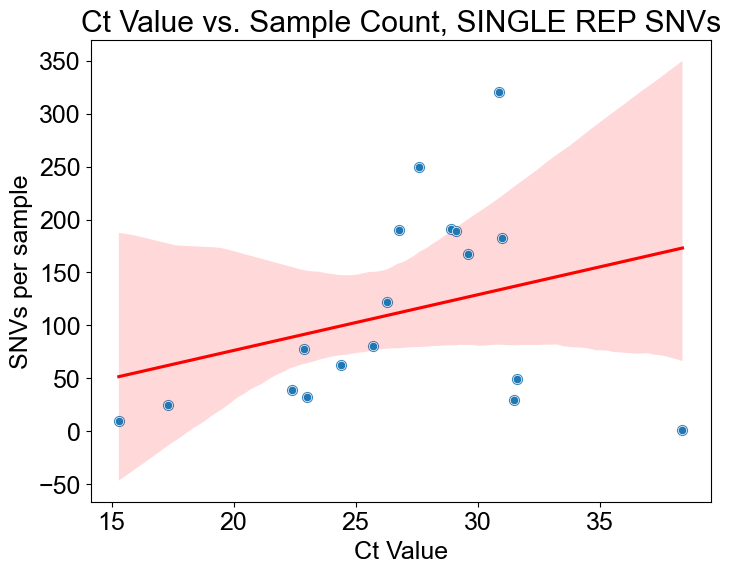

In [33]:
# Count occurrences of each sample_ID

single_rep_vars = vars[vars['rep_shared'] == 'single']

sample_counts = single_rep_vars['sample'].value_counts().reset_index()
sample_counts.columns = ['sample', 'count']

# Merge with Ct values (assuming each sample_ID has a unique Ct value)
merged_df = single_rep_vars[['sample', 'ct_value']].drop_duplicates().merge(sample_counts, on='sample')

# Scatter plot
plt.figure(figsize=(8, 6))

sns.regplot(data=merged_df, x='ct_value', y='count', scatter_kws={'s': 50}, line_kws={'color': 'red'})

sns.scatterplot(data=merged_df, x='ct_value', y='count')


# Labels and title
plt.xlabel('Ct Value')
plt.ylabel('SNVs per sample')
plt.title('Ct Value vs. Sample Count, SINGLE REP SNVs')


plt.show()


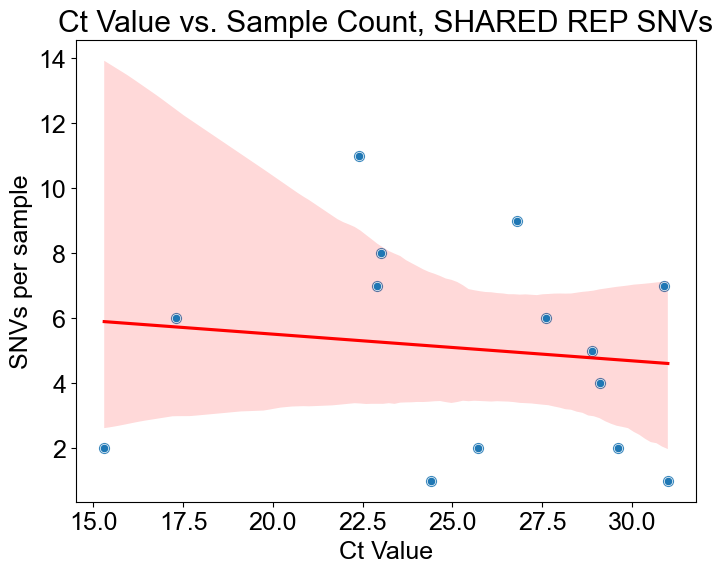

In [34]:
# Count occurrences of each sample_ID

single_rep_vars = vars[vars['rep_shared'] == 'shared']

sample_counts = single_rep_vars['sample'].value_counts().reset_index()
sample_counts.columns = ['sample', 'count']

# Merge with Ct values (assuming each sample_ID has a unique Ct value)
merged_df = single_rep_vars[['sample', 'ct_value']].drop_duplicates().merge(sample_counts, on='sample')

# Scatter plot
plt.figure(figsize=(8, 6))

sns.regplot(data=merged_df, x='ct_value', y='count', scatter_kws={'s': 50}, line_kws={'color': 'red'})

sns.scatterplot(data=merged_df, x='ct_value', y='count')


# Labels and title
plt.xlabel('Ct Value')
plt.ylabel('SNVs per sample')
plt.title('Ct Value vs. Sample Count, SHARED REP SNVs')


plt.show()


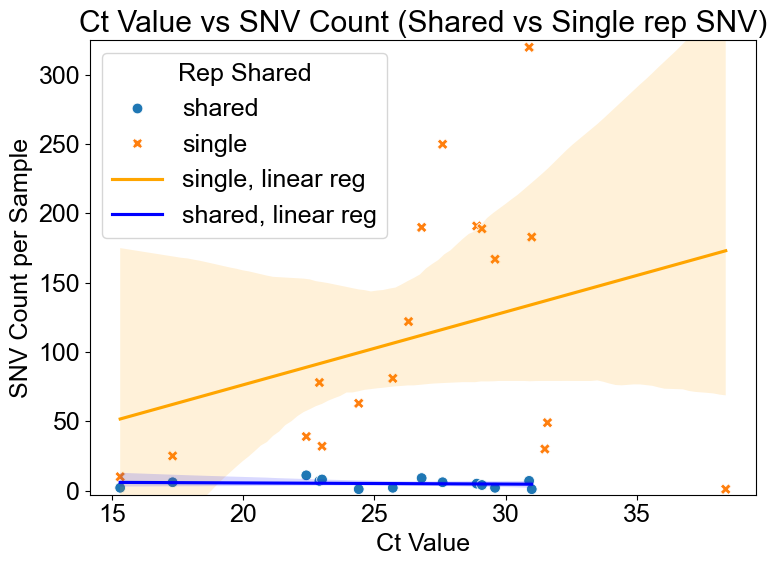

In [35]:
# Group by sample_ID and rep_shared to count SNVs
rep_counts = vars.groupby(['sample', 'rep_shared']).size().reset_index(name='count')

# Merge in Ct values (assuming unique per sample_ID)
sample_metadata = vars[['sample', 'ct_value']].drop_duplicates()
rep_counts = rep_counts.merge(sample_metadata, on='sample')


plt.figure(figsize=(8, 6))

# Scatterplot and regression per group
sns.scatterplot(data=rep_counts, x='ct_value', y='count', hue='rep_shared', style='rep_shared', s=60)
sns.regplot(data=rep_counts[rep_counts['rep_shared'] == 'single'], 
            x='ct_value', y='count', scatter=False, label='single, linear reg', color='orange')
sns.regplot(data=rep_counts[rep_counts['rep_shared'] == 'shared'], 
            x='ct_value', y='count', scatter=False, label='shared, linear reg', color='blue')

# Labels and formatting
plt.xlabel('Ct Value')
plt.ylabel('SNV Count per Sample')
plt.title('Ct Value vs SNV Count (Shared vs Single rep SNV)')
plt.ylim(-3,325)
plt.legend(title='Rep Shared')
plt.tight_layout()

# plt.savefig("seq/analysis/figures/ctval_snvcount_regress.pdf", bbox_inches='tight', dpi=300)
plt.show()


In [36]:
vars['gene_pos_nt'] = vars['gene'] + "_" + vars['position'].astype(str)
vars.head(5)

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,freq_bin,ct_value,gene_pos_nt
0,ha,1219,T,Leu397Ser,HA,0.0,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single,0.0121,0.01–0.02,17.3,HA_1219
1,ha,1343,T,Ser438Ser,HA,0.0,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single,0.0106,0.01–0.02,17.3,HA_1343
2,ha,1426,A,Lys466Arg,HA,0.0,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single,0.0101,0.01–0.02,17.3,HA_1426
3,ha,1449,A,Asn474Asp,HA,0.0,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single,0.0104,0.01–0.02,17.3,HA_1449
4,mp,722,C,Leu233Phe,M1,0.0,0.0118,c1,233,M1_233,c1_M1_233,nonsynonymous,single,0.0118,0.01–0.02,17.3,M1_722


In [37]:
shared_vars.columns

Index(['segment', 'position', 'allele', 'coding_region_change', 'gene',
       'Frequency_1', 'Frequency_2', 'sample', 'amino_acid', 'gene_pos',
       'sample_var', 'syn_non', 'rep_shared', 'avg_freq'],
      dtype='object')

In [38]:
shared_vars['gene_pos_nt'] = shared_vars['gene'] + "_" + shared_vars['position'].astype(str)
shared_vars.head(5)

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,gene_pos_nt
0,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1,351,HA_351,c1_HA_351,nonsynonymous,shared,0.37745,HA_1081
5,mp,314,G,Val97Ile,M1,0.0134,0.0152,c1,97,M1_97,c1_M1_97,nonsynonymous,shared,0.01430,M1_314
10,na,720,A,Asn234Ser,NA,0.0113,0.0128,c1,234,NA_234,c1_NA_234,nonsynonymous,shared,0.01205,NA_720
14,na,1221,A,Asn401Ser,NA,0.0107,0.0258,c1,401,NA_401,c1_NA_401,nonsynonymous,shared,0.01825,NA_1221
18,pa,300,T,Asn92Asn,PA,0.0516,0.0593,c1,92,PA_92,c1_PA_92,synonymous,shared,0.05545,PA_300


In [39]:
# Group by 'sample_ID' and 'gene' and count unique values in 'synonymous/nonsynonymous'
syn_nonsyn_counts = shared_vars.groupby(['sample', 'gene'])['syn_non'].value_counts().unstack(fill_value=0)

# Optionally, reset index to make it easier to work with
syn_nonsyn_counts = syn_nonsyn_counts.reset_index()

# Print or export the result
syn_nonsyn_counts


syn_non,sample,gene,nonsynonymous,synonymous
0,c1,HA,1,0
1,c1,M1,1,0
2,c1,NA,2,0
3,c1,PA,1,1
4,c11,HA,3,1
5,c11,PA,1,0
6,c12,M1,0,1
7,c13,HA,1,0
8,c13,M1,0,1
9,c13,PA,1,0


In [40]:
# Group by 'sample_ID' and 'gene' and count unique values in 'synonymous/nonsynonymous'
syn_nonsyn_counts = shared_vars.groupby(['sample'])['syn_non'].value_counts().unstack(fill_value=0)

# Optionally, reset index to make it easier to work with
total_syn_nonsyn_counts = syn_nonsyn_counts.reset_index()
total_syn_nonsyn_counts = total_syn_nonsyn_counts.rename_axis(None, axis=1).reset_index()

total_syn_nonsyn_counts = total_syn_nonsyn_counts.drop(columns=['index'])

# Print or export the result
total_syn_nonsyn_counts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample         14 non-null     object
 1   nonsynonymous  14 non-null     int64 
 2   synonymous     14 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 464.0+ bytes


In [41]:
total_syn_nonsyn_counts

,sample,nonsynonymous,synonymous
0,c1,5,1
1,c11,4,1
2,c12,0,1
3,c13,4,3
4,c14,2,0
5,c15,3,1
6,c17,2,0
7,c2,10,1
8,c4,3,3
9,c5,4,5


In [42]:
shared_vars["avg_freq_percent"] = shared_vars["avg_freq"] * 100
shared_vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,gene_pos_nt,avg_freq_percent
0,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1,351,HA_351,c1_HA_351,nonsynonymous,shared,0.37745,HA_1081,37.745
5,mp,314,G,Val97Ile,M1,0.0134,0.0152,c1,97,M1_97,c1_M1_97,nonsynonymous,shared,0.01430,M1_314,1.430
10,na,720,A,Asn234Ser,NA,0.0113,0.0128,c1,234,NA_234,c1_NA_234,nonsynonymous,shared,0.01205,NA_720,1.205
14,na,1221,A,Asn401Ser,NA,0.0107,0.0258,c1,401,NA_401,c1_NA_401,nonsynonymous,shared,0.01825,NA_1221,1.825
18,pa,300,T,Asn92Asn,PA,0.0516,0.0593,c1,92,PA_92,c1_PA_92,synonymous,shared,0.05545,PA_300,5.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,pb2,1414,A,Ile463Leu,PB2,0.0184,0.0295,c7,463,PB2_463,c7_PB2_463,nonsynonymous,shared,0.02395,PB2_1414,2.395
1736,pb2,2133,A,Lys702Lys,PB2,0.0130,0.0101,c7,702,PB2_702,c7_PB2_702,synonymous,shared,0.01155,PB2_2133,1.155
1806,np,436,G,Ala131Thr,NP,0.0224,0.0719,c8,131,NP_131,c8_NP_131,nonsynonymous,shared,0.04715,NP_436,4.715
1905,pb2,1936,A,Thr637Ala,PB2,0.0111,0.1552,c8,637,PB2_637,c8_PB2_637,nonsynonymous,shared,0.08315,PB2_1936,8.315


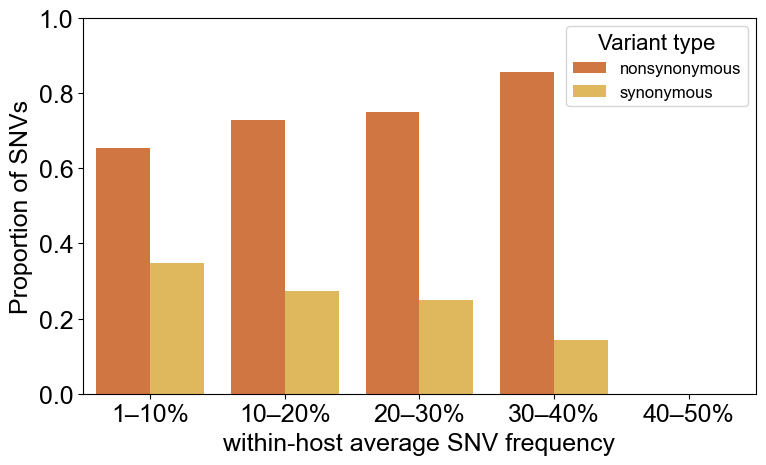

In [65]:
# written by maria maltepes
# not an sfs, just plots how many nonsyn and syn mutations are in each freq bin

palette = {
    "nonsynonymous": "#e8702a",  # burnt orange
    "synonymous": "#F5BF47"
}

bins = [0, 10, 20, 30, 40, 50]
labels = ["1–10%", "10–20%", "20–30%", "30–40%", "40–50%"]

shared_vars["freq_bin"] = pd.cut(
    shared_vars["avg_freq_percent"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

group_counts = shared_vars.groupby(["freq_bin", "syn_non"], observed=False).size().reset_index(name="count")

totals = group_counts.groupby("freq_bin", observed=False)["count"].transform("sum")
group_counts["proportion"] = group_counts["count"] / totals

plt.figure(figsize=(8, 5))
sns.barplot(
    data=group_counts,
    x="freq_bin",
    y="proportion",
    hue="syn_non",
    palette=palette
)

plt.xlabel("within-host average SNV frequency")
plt.ylabel("Proportion of SNVs")

plt.ylim(0, 1)
plt.legend(
    title="Variant type",
    fontsize=12,        
    title_fontsize=16  
)

plt.tight_layout()
plt.show()


In [44]:
# written by louise moncla

from scipy.integrate import quad

def integrate_over_bins(lower_bound,upper_bound):
    # generate lambda function for 1/x
    f= lambda x:(1/x)

    # integrate between bins 
    integral = quad(f, lower_bound, upper_bound)[0]
    return(integral)

def return_area_under_curve(bins):

    total_area_under_curve = 0
    integrals = []
    
    for i in range(len(bins)-1):
        lower_bound = bins[i]
        upper_bound = bins[i+1]
        integral = integrate_over_bins(lower_bound,upper_bound)
        integrals.append(integral)
        
    total_area_under_curve = np.asarray(integrals).sum()
    return(total_area_under_curve, integrals)

def return_neutral_expectation(total_area_under_curve, integrals):
    proportions = []
    for i in integrals: 
        proportion = i/total_area_under_curve
        proportions.append(proportion)
        
    return(proportions)

In [45]:
# written by louise moncla

bins = [0.01,0.1,0.2,0.3,0.4,0.5]
total_area_under_curve, integrals = return_area_under_curve(bins)
proportions = return_neutral_expectation(total_area_under_curve, integrals)
neutral_df = pd.DataFrame({"bin":["1-10%","10-20%","20-30%","30-40%","40-50%"],"expected":proportions})

neutral_df

,bin,expected
0,1-10%,0.588592
1,10-20%,0.177184
2,20-30%,0.103646
3,30-40%,0.073538
4,40-50%,0.057040


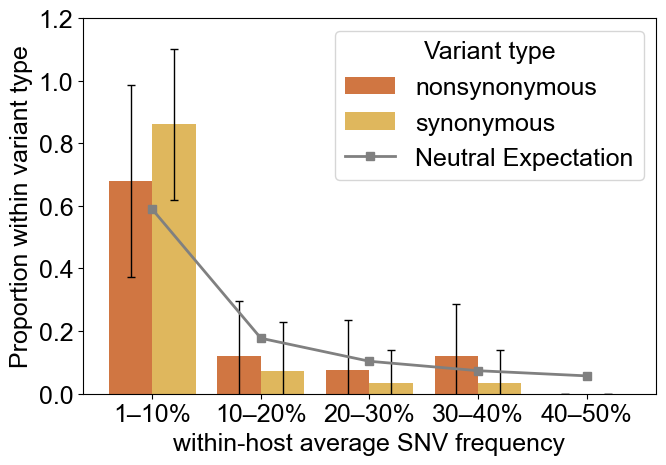

In [46]:
# written by maria maltepes
# sfs plot

palette = {
    "nonsynonymous": "#e8702a",  # burnt orange
    "synonymous": "#F5BF47"
}

bins = [0, 10, 20, 30, 40, 50]
labels = ["1–10%", "10–20%", "20–30%", "30–40%", "40–50%"]

# assigning freq bins
shared_vars["freq_bin"] = pd.cut(
    shared_vars["avg_freq_percent"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# Calculate proportion per sample within variant type
# (so that we can later compute SD across samples)
prop_df = (
    shared_vars
    .groupby(["sample", "freq_bin", "syn_non"], observed=False)
    .size()
    .reset_index(name="count")
)

totals_per_sample_type = prop_df.groupby(["sample", "syn_non"], observed=False)["count"].transform("sum")
prop_df["proportion"] = prop_df["count"] / totals_per_sample_type

# computing mean and std for each bin & type
summary_stats = (
    prop_df
    .groupby(["freq_bin", "syn_non"], observed=False)
    .agg(mean_prop=("proportion", "mean"),
         std_prop=("proportion", "std"))
    .reset_index()
)

fig, ax = plt.subplots(figsize=(7,5))

sns.barplot(
    data=summary_stats,
    x="freq_bin",
    y="mean_prop",
    hue="syn_non",
    palette=palette,
    errorbar=None,
    ax=ax
)

# error bars
for i, row in summary_stats.iterrows():
    x_pos = labels.index(row["freq_bin"])  # numeric category index
    hue_offset = -0.2 if row["syn_non"] == "nonsynonymous" else 0.2
    ax.errorbar(
        x=x_pos + hue_offset,
        y=row["mean_prop"],
        yerr=row["std_prop"],
        fmt='none',
        ecolor='black',
        capsize=3,
        linewidth=1
    )

# using seaborn axis
x_positions = range(len(labels))  # [0,1,2,3,4]

ax.plot(
    x_positions,
    neutral_df["expected"],
    color="gray",
    marker="s",
    linestyle="-",
    linewidth=2,
    markersize=6,
    label="Neutral Expectation"
)

ax.set_xlabel("within-host average SNV frequency")
ax.set_ylabel("Proportion within variant type")
ax.set_ylim(0, 1.2)
ax.legend(title="Variant type")
plt.tight_layout()
plt.show()


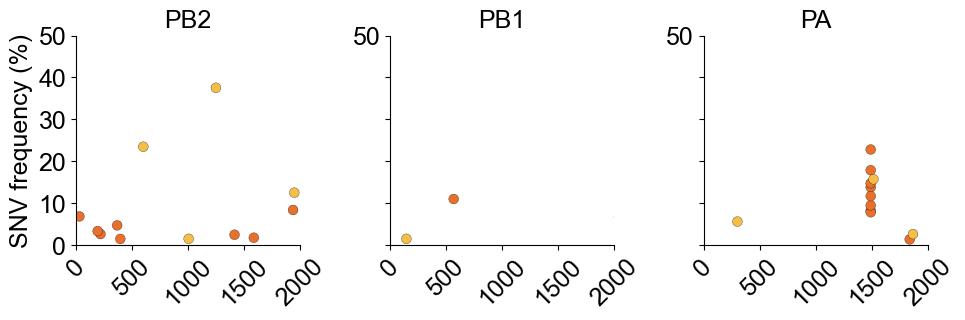

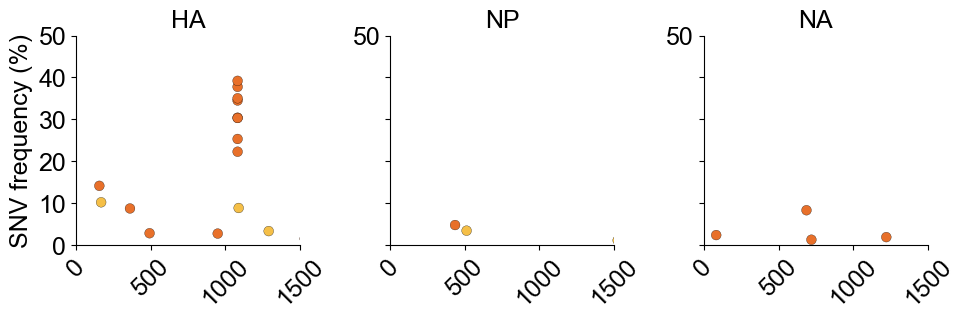

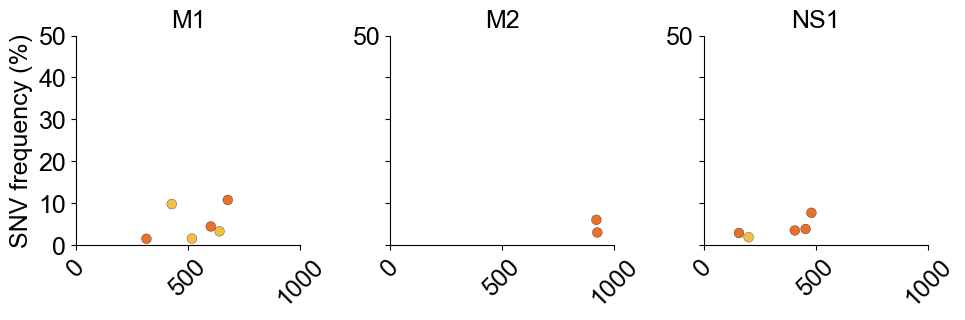

In [47]:
# written by maria maltepes
# where are the shared variants across the genome

palette = {
    "nonsynonymous": "#e8702a",
    "synonymous": "#F5BF47"
}

gene_groups = {
    "Group 1": (["PB2", "PB1", "PA"], 2000),
    "Group 2": (["HA", "NP", "NA"], 1500),
    "Group 3": (["M1", "M2", "NS1", "NEP"], 1000)
}

# flu order 
segment_order = ["PB2", "PB1", "PA", "HA", "NP", "NA", "M1", "M2", "NS1"]

for group_name, (genes, xlim) in gene_groups.items():
    subset = shared_vars[shared_vars["gene"].isin(genes)].copy()
    
    subset["gene"] = pd.Categorical(subset["gene"], categories=[g for g in segment_order if g in genes], ordered=True)

    g = sns.FacetGrid(subset, col="gene", col_wrap=3, height=3.5, sharey=True)

    g.map_dataframe(
        sns.scatterplot,
        x="position",
        y="avg_freq_percent",
        hue="syn_non",
        palette=palette,
        s=50,
        edgecolor="black",
        linewidth=0.2
    )

    g.set_axis_labels("", "SNV frequency (%)")
    g.set_titles("{col_name}")
    g.set(ylim=(0, 50))

    for ax, gene_name in zip(g.axes.flatten(), subset["gene"].cat.categories):
        xticks = np.arange(0, xlim + 1, 500)  # ticks at 0, 500, 1000,...
        ax.set_xlim(0, xlim)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks, rotation=45)
        ax.set_yticks([0, 10, 20, 30, 40, 50])


    g.fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85, right=0.9)
    
    plt.show()


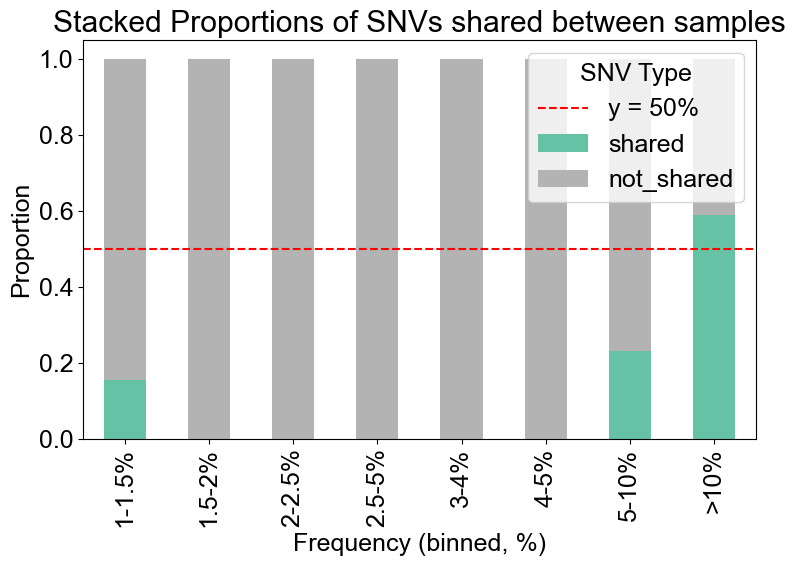

In [69]:
# between samples

shared_vars['between_samples'] = shared_vars['gene_pos'].duplicated(keep=False).map({True: 'shared', False: 'not_shared'})
shared_vars

bins = [0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.1, float('inf')]
labels = ['1-1.5%', '1.5-2%', '2-2.5%','2.5-5%', '3-4%', '4-5%', '5-10%', '>10%']
shared_vars['freq_bin'] = pd.cut(shared_vars['avg_freq'], bins=bins, labels=labels, right=False)

# Count occurrences of each category in each bin
grouped = shared_vars.groupby(['freq_bin', 'between_samples'], observed=False).size().reset_index(name='count')

# Normalize within each bin
grouped['proportion'] = grouped.groupby('freq_bin', observed=False)['count'].transform(lambda x: x / x.sum())


# Pivot data for stacked bar chart
pivot_df = grouped.pivot(index='freq_bin', columns='between_samples', values='proportion').fillna(0)

pivot_df = pivot_df[['shared', 'not_shared']]

pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.axhline(y=0.5, color='r', linestyle='--', label='y = 50%')


plt.xlabel('Frequency (binned, %)')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of SNVs shared between samples')
plt.legend(title='SNV Type', loc='best')
plt.tight_layout()
plt.show()


In [49]:
##pulling out variants that appear in more than one sample

# Assuming your dataframe is named 'df'
duplicated_gene_pos = shared_vars[shared_vars['gene_pos'].duplicated()]

# To get just the duplicated values in the 'gene_pos' column
duplicated_values = shared_vars[shared_vars['gene_pos'].duplicated()]['gene_pos'].unique()

# Print the duplicated values
print(duplicated_values)

['HA_351' 'PA_489' 'PB1_737']


In [50]:
# Get rows where 'gene_pos' is NOT duplicated (i.e., appears only once)
unique_gene_pos_rows = shared_vars[~shared_vars['gene_pos'].duplicated(keep=False)]

# If you just want the values (not full rows)
unique_gene_pos_values = unique_gene_pos_rows['gene_pos'].unique()

# Print the unique (non-duplicated) values
print(unique_gene_pos_values)


['M1_97' 'NA_234' 'NA_401' 'PA_92' 'HA_155' 'HA_501' 'HA_532' 'M1_134'
 'M1_205' 'PB1_182' 'PB2_123' 'PB2_407' 'PB2_640' 'NA_223' 'NS1_58'
 'PA_605' 'NS1_143' 'PB1_758' 'HA_43' 'HA_307' 'M1_192' 'M1_218' 'NS1_44'
 'NS1_152' 'PB2_1' 'PB2_114' 'PB2_678' 'HA_420' 'NP_156' 'PB2_191'
 'PB2_520' 'HA_47' 'HA_111' 'HA_353' 'HA_534' 'NP_493' 'PA_497' 'PB1_673'
 'M1_164' 'M2_70' 'M2_71' 'NA_22' 'PB1_41' 'PB2_64' 'HA_566' 'PA_614'
 'PB2_56' 'PB2_326' 'PB2_463' 'PB2_702' 'NP_131' 'PB2_637' 'NS1_127']


In [51]:
duplicated_values.tolist()

['HA_351', 'PA_489', 'PB1_737']

In [68]:
# Assuming your dataframe is named 'df' and the list of values is 'specific_values'
specific_values = ['HA_351', 'PA_489', 'PB1_737']  # replace with your specific values

# Filter the rows where 'gene_pos' is in the specific list of values
filtered_rows = shared_vars[shared_vars['gene_pos'].isin(specific_values)]

# print(filtered_rows)


In [53]:
print(filtered_rows['gene_pos'].nunique)

<bound method IndexOpsMixin.nunique of 0        HA_351
23       PA_489
104      HA_351
206      PA_489
363      HA_351
540      PA_489
667      HA_351
729      PA_489
883      PA_489
1113     HA_351
1147    PB1_737
1183     HA_351
1337     PA_489
1439     HA_351
1550     PA_489
1693    PB1_737
1700     HA_351
1719     PA_489
Name: gene_pos, dtype: object>


In [54]:
filtered_rows = filtered_rows.sort_values(by=["gene", "position"], ascending=[False, True])
filtered_rows

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,gene_pos_nt,avg_freq_percent,freq_bin,between_samples
1147,pb1,2235,A,Lys737Lys,PB1,0.0127,0.0101,c2,737,PB1_737,c2_PB1_737,synonymous,shared,0.01140,PB1_2235,1.140,1-1.5%,shared
1693,pb1,2235,A,Lys737Lys,PB1,0.0165,0.0102,c6,737,PB1_737,c6_PB1_737,synonymous,shared,0.01335,PB1_2235,1.335,1-1.5%,shared
23,pa,1489,T,Cys489Ser,PA,0.0719,0.0905,c1,489,PA_489,c1_PA_489,nonsynonymous,shared,0.08120,PA_1489,8.120,5-10%,shared
206,pa,1489,T,Cys489Ser,PA,0.0883,0.2681,c11,489,PA_489,c11_PA_489,nonsynonymous,shared,0.17820,PA_1489,17.820,>10%,shared
540,pa,1489,T,Cys489Ser,PA,0.0661,0.2085,c13,489,PA_489,c13_PA_489,nonsynonymous,shared,0.13730,PA_1489,13.730,>10%,shared
729,pa,1489,T,Cys489Ser,PA,0.0977,0.3577,c14,489,PA_489,c14_PA_489,nonsynonymous,shared,0.22770,PA_1489,22.770,>10%,shared
883,pa,1489,T,Cys489Ser,PA,0.0124,0.2816,c15,489,PA_489,c15_PA_489,nonsynonymous,shared,0.14700,PA_1489,14.700,>10%,shared
1337,pa,1489,T,Cys489Ser,PA,0.1172,0.0383,c4,489,PA_489,c4_PA_489,nonsynonymous,shared,0.07775,PA_1489,7.775,5-10%,shared
1550,pa,1489,T,Cys489Ser,PA,0.0914,0.0970,c5,489,PA_489,c5_PA_489,nonsynonymous,shared,0.09420,PA_1489,9.420,5-10%,shared
1719,pa,1489,T,Cys489Ser,PA,0.1612,0.0712,c7,489,PA_489,c7_PA_489,nonsynonymous,shared,0.11620,PA_1489,11.620,>10%,shared


In [55]:
filtered_rows['gene'].value_counts()

gene
PA     8
HA     8
PB1    2
Name: count, dtype: int64

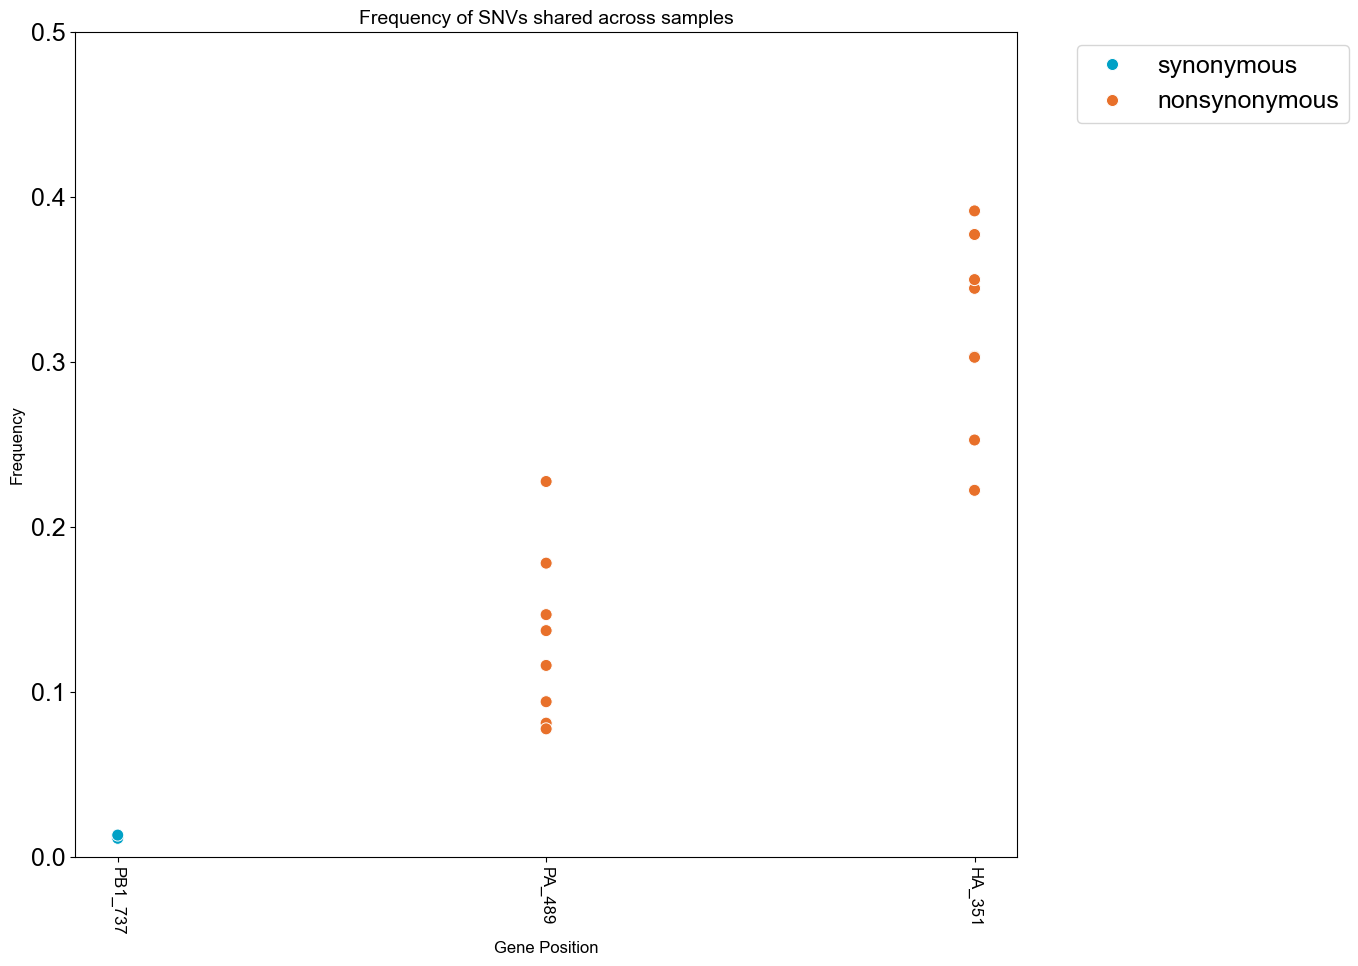

In [67]:

plt.figure(figsize=(14, 10))
sns.scatterplot(data=filtered_rows, x="gene_pos", y="avg_freq", hue="syn_non", palette=["#00A1C6", "#e8702a"],
               s=75)

plt.xlabel("Gene Position", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of SNVs shared across samples", fontsize=14)
plt.xticks(rotation=270, fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0,0.5)

plt.tight_layout()

plt.show()


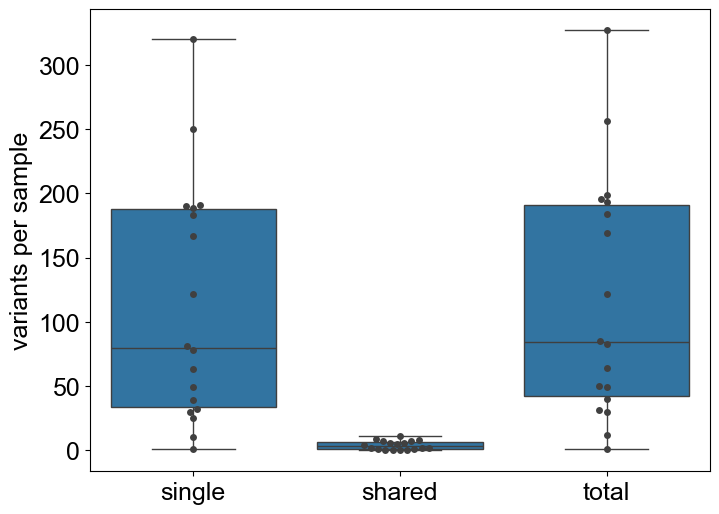

rep_shared
single    112.222222
shared      3.944444
total     116.166667
dtype: float64


In [57]:
'''
written by maria maltepes

box and whisker plots for:
    - mean number of single variants across samples
    - mean number of shared variants
    - single and shared combined

'''


variant_counts = vars.groupby(['sample', 'rep_shared']).size().reset_index(name='count')



variant_pivot = variant_counts.pivot(index='sample', columns='rep_shared', values='count').fillna(0)


variant_pivot['total'] = variant_pivot.sum(axis=1)


variant_long = variant_pivot.reset_index().melt(id_vars='sample', value_vars=['single', 'shared', 'total'],
                                               var_name='variant_type', value_name='count')


plt.figure(figsize=(8,6))
sns.boxplot(data=variant_long, x='variant_type', y='count')
sns.swarmplot(data=variant_long, x='variant_type', y='count', color=".25")  # optional, to show points
plt.ylabel('variants per sample')
plt.xlabel('')

plt.show()

mean_variants = variant_pivot[['single', 'shared', 'total']].mean()
print(mean_variants)




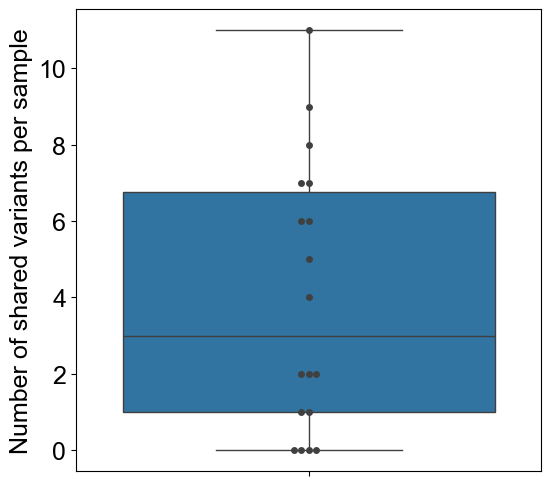

Samples with 0 shared variants: ['c10', 'c16', 'c18', 'c20']
Sample with the most shared variants: c2 (11.0 variants)


In [58]:
# written by maria maltepes
shared_variants = variant_pivot['shared'].reset_index()

plt.figure(figsize=(6,6))
sns.boxplot(y='shared', data=shared_variants)
sns.swarmplot(y='shared', data=shared_variants, color=".25")  
plt.ylabel('Number of shared variants per sample')
plt.show()

# samples with the most shared variants
max_shared_sample = variant_pivot['shared'].idxmax()
max_shared_count = variant_pivot['shared'].max()

# samples with 0 shared variants
zero_shared_samples = variant_pivot[variant_pivot['shared'] == 0].index.tolist()

print("Samples with 0 shared variants:", zero_shared_samples)

print(f"Sample with the most shared variants: {max_shared_sample} ({max_shared_count} variants)")



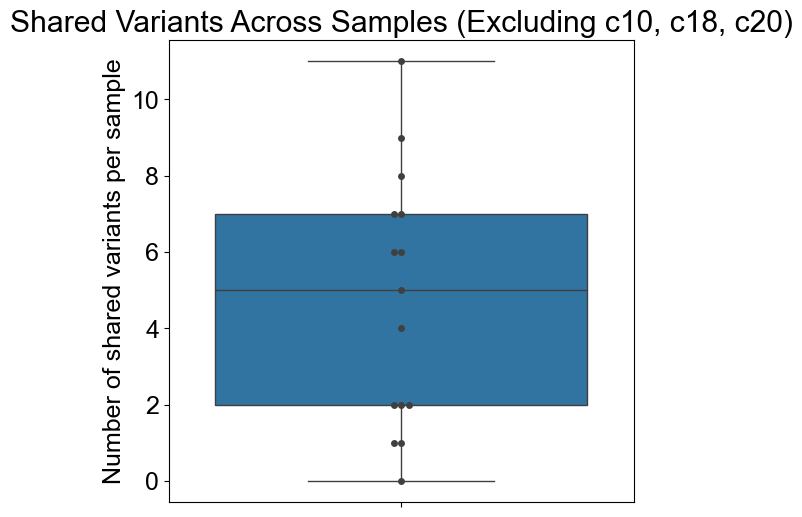

Mean variants per sample (excluding c10, c18, c20):
rep_shared
single    129.333333
shared      4.733333
total     134.066667
dtype: float64


In [59]:

# written by maria maltepes
# they dont have both replicates with high coverage 

excluded_samples = ['c10', 'c18', 'c20']
variant_filtered = variant_pivot.drop(index=excluded_samples)

plt.figure(figsize=(6,6))
sns.boxplot(y=variant_filtered['shared'])
sns.swarmplot(y=variant_filtered['shared'], color=".25")  # optional, shows individual points
plt.ylabel('Number of shared variants per sample')
plt.title('Shared Variants Across Samples (Excluding c10, c18, c20)')
plt.show()

mean_variants_filtered = variant_filtered[['single', 'shared', 'total']].mean()
print("Mean variants per sample (excluding c10, c18, c20):")
print(mean_variants_filtered)
